In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


from sklearn.linear_model import LogisticRegression



/kaggle/input/fish-market/Fish.csv


In [33]:
df=pd.read_csv("/kaggle/input/fish-market/Fish.csv")

In [34]:
df.shape

(159, 7)

In [35]:
df.head(159)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [37]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:>

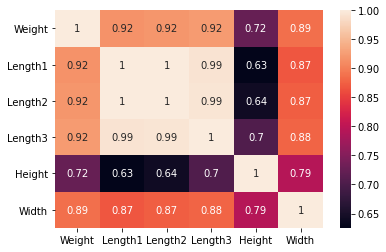

In [38]:
sns.heatmap(df.corr(),annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='Length3'>

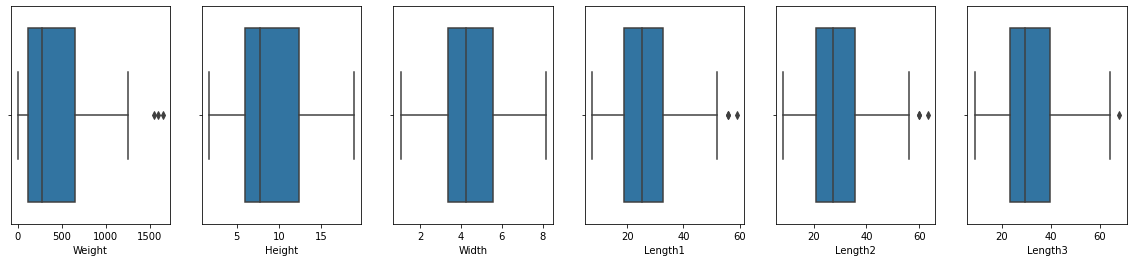

In [39]:
plt.figure(figsize=(20,4))
plt.subplot(1,6,1)
sns.boxplot(df['Weight'])
plt.subplot(1,6,2)
sns.boxplot(df['Height'])
plt.subplot(1,6,3)
sns.boxplot(df['Width'])
plt.subplot(1,6,4)
sns.boxplot(df['Length1'])
plt.subplot(1,6,5)
sns.boxplot(df['Length2'])
plt.subplot(1,6,6)
sns.boxplot(df['Length3'])

In [40]:
def outlier_threshold(data, variable):
    q1=data[variable].quantile(0.25)
    q3=data[variable].quantile(0.75)
    IQR=q3-q1
    lower_limit, upper_limit=q1 - 1.5 * IQR, q3 + 1.5 * IQR
    return lower_limit, upper_limit

def has_outlier(data, variable):
    lower_limit, upper_limit=outlier_threshold(data, variable)
    if data[(data[variable]<lower_limit) | (data[variable]>upper_limit)].any(axis=None):
        print(variable, 'Yes')
    else:
        print(variable, 'No')
        
columns=df.columns
columns=columns.drop('Species')

for column in columns:
    has_outlier(df, columns)

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object') Yes
Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object') Yes
Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object') Yes
Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object') Yes
Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object') Yes
Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object') Yes


In [41]:
def replace_with_threshold(data, num_feature):
    for variable in num_feature:
        lower_limit, upper_limit=outlier_threshold(data, variable)
        df.loc[(data[variable]<lower_limit), variable]=lower_limit
        df.loc[(data[variable]>upper_limit), variable]=upper_limit
        
replace_with_threshold(df, columns)  

In [42]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='Length3'>

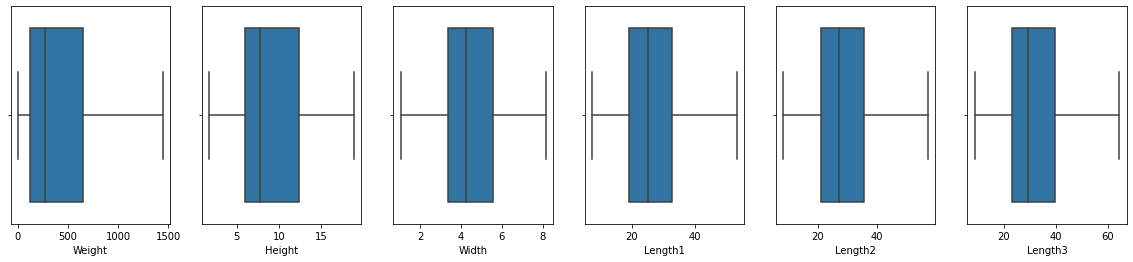

In [43]:
plt.figure(figsize=(20,4))
plt.subplot(1,6,1)
sns.boxplot(df['Weight'])
plt.subplot(1,6,2)
sns.boxplot(df['Height'])
plt.subplot(1,6,3)
sns.boxplot(df['Width'])
plt.subplot(1,6,4)
sns.boxplot(df['Length1'])
plt.subplot(1,6,5)
sns.boxplot(df['Length2'])
plt.subplot(1,6,6)
sns.boxplot(df['Length3'])

In [44]:
X=df.drop(["Species"],axis=1)
Y=df["Species"]

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_lab= le.fit_transform(Y)

labels = pd.DataFrame({"Y":Y,"ylabel":Y_lab})
labels.drop_duplicates(inplace=True)
labels = labels.sort_values(by="ylabel")
labels

,Y,ylabel
0,Bream,0
61,Parkki,1
72,Perch,2
128,Pike,3
35,Roach,4
145,Smelt,5
55,Whitefish,6


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
Y=Y_lab
Y=pd.DataFrame(Y)

In [70]:
Y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [71]:
Y.tail()

,0
154,5
155,5
156,5
157,5
158,5


In [73]:
from sklearn.model_selection import train_test_split
Y=np.ravel(Y)
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(max_iter=4000)
LR.fit(X_train,Y_train)
print(LR.score(X_test,Y_test))



0.875


In [67]:
Y_train.shape

(127, 1)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,21):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,Y_train)
    
    print("Score for k=",k,"is,",KNN.score(X_test,Y_test))
    



Score for k= 2 is, 0.84375
Score for k= 3 is, 0.84375
Score for k= 4 is, 0.84375
Score for k= 5 is, 0.875
Score for k= 6 is, 0.8125
Score for k= 7 is, 0.78125
Score for k= 8 is, 0.78125
Score for k= 9 is, 0.75
Score for k= 10 is, 0.75
Score for k= 11 is, 0.71875
Score for k= 12 is, 0.78125
Score for k= 13 is, 0.78125
Score for k= 14 is, 0.78125
Score for k= 15 is, 0.78125
Score for k= 16 is, 0.8125
Score for k= 17 is, 0.78125
Score for k= 18 is, 0.78125
Score for k= 19 is, 0.78125
Score for k= 20 is, 0.78125
